In [1]:
import time

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [2]:
np.random.seed(0)

n_samples = 1500
X, y = datasets.make_blobs(n_samples=n_samples, random_state=8)

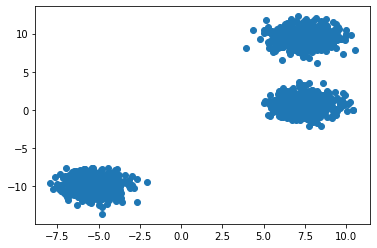

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [4]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.linalg import Vectors

In [5]:
data = np.hstack((y[:,None], X))
dataset = map(lambda x: (int(x[0]), Vectors.dense(x[1:])), data)
df = spark.createDataFrame(dataset,schema=["label", "features"])
df.show(5)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|    0|[5.86749806733564...|
|    0|[5.61369981522996...|
|    0|[7.22508427785770...|
|    1|[6.76282254631617...|
|    1|[8.01618240019779...|
+-----+--------------------+
only showing top 5 rows



In [6]:
kmeans = KMeans().setK(3).setSeed(1)
model = kmeans.fit(df)

In [7]:
predictions = model.transform(df)

In [8]:
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[7.41429427 0.67834951]
[-5.31738211 -9.81080765]
[7.47871593 9.43027105]


In [9]:
colours = ['y', 'b', 'g']

In [10]:
pdpred = predictions.toPandas()
pdpred['features']
pdpred['x0'] = pdpred['features'].map(lambda x: x[0])
pdpred['x1'] = pdpred['features'].map(lambda x: x[1])
pdpred['colour'] = pdpred['prediction'].map(lambda x: colours[x])
pdpred.head()

,label,features,prediction,x0,x1,colour
0,0,"[5.867498067335642, 8.177151880030342]",2,5.867498,8.177152,g
1,0,"[5.613699815229969, 9.932955265811792]",2,5.613700,9.932955,g
2,0,"[7.225084277857703, 10.448861938921507]",2,7.225084,10.448862,g
3,1,"[6.76282254631617, 0.6051453524386279]",0,6.762823,0.605145,y
4,1,"[8.016182400197797, 1.5431470087909844]",0,8.016182,1.543147,y


<AxesSubplot:xlabel='x0', ylabel='x1'>

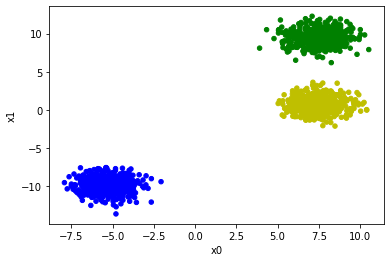

In [11]:
pdpred.plot.scatter(x='x0', y='x1', c=pdpred['colour'])